# Lab 7 - Numerical Differentiation
---------------------------------------------------------------------------

Author: Kevin Paganini   
Date: 10/30/2022   
Description: In this lab everything revolves around approximating a derivative via numerical differentiation. Numerical differentiation allows us to approximate the value of a derivative at a given point using a small delta value and only the original function. We then perform grid search over the derivative space.

## Questions:

After you run all the experiments create a markdown cell to answer questions in. Copy and 
paste each question into the cell prior to answering it. The following questions will be graded:   

1. For experiment 1, how did your approximated derivatives (numerical solutions) 
compare to the analytical solution. Describe what effect the h term had on the accuracy 
of the approximation. Discuss considerations/tradeoffs when picking an optimal h value.   
- My approximated derivative with values 0.01 and 0.1 for h were quite accurate. However, when h was equal to 1 or 2 the results started to stray further away from the actual value. A general rule here is that the smaller h is the more accurate the result will be. This makes sense when looking at the definition of a derivative where you are taking the limit as h approaches 0. One want to pick a small value of h, however depending on your system, your machine can only store floats up to a certain accuracy before a rounding error is introduced. Ideally, you want to come as close to this point as possible without introducing rounding error. 

2. In experiment 2 you should have found both local extrema of the function. Describe 
what information the derivative provides and how you found these extrema. If each 
numerical approximation of the derivative didn’t always lead to both extrema of the 
function, explain why.   
- The derivative tells you the direction and magnitude of the slope. One can find extrema by figuring out where the derivative is equal to 0. The reason behind this is because the function is switching from rising to falling or conversely falling to rising, hence switching signs (+/-), which means it must pass 0. Where the derivative is equal to 0 is where the extrema is. Each numerical approximation of the derivative is approximately where the extrema is supposed to be. The greater h was the further away the approximation became from the actual value. Interestingly, they all strayed to the left (they were smaller).

3. Be creative - brainstorm a way that you could leverage the information of the derivative 
to only find the minima, not all extrema.   
- One could find only the minima, by first finding all the points where the derivative is equal to 0. Then take a slightly lesser value and approximate the derivative, then do the same with a slightly larger value. If the slightly smaller value comes out to being negative and the larger, positive, than you have a minima. 

4. For experiment 3, you performed another grid search. Compare and contrast what 
features you were looking for in the error-space grid search (lab 06) and the derivative-
space grid search. Make sure to compare the computational complexity between these 
spaces. Depending on your answer do you think it makes more sense to perform a grid 
search in error space or derivative space?   
- In lab 6 we were augmenting the standard deviation as well as the mean to find values that were minimized to zero. 
- In lab 7 we were augmenting the standard deviation as well as the mean. We then approximated the value of the derivative at that mean and std. We repeated this for all points in the grid. 
- Technically speaking, the grid search on the derivatives was computationally more expensive. We had to calculate the cost 2 times per std and mean to get the derivative. In practice one does not perform a classical grid search with a grid of points on derivative space.

5. Be even more creative – brainstorm a way (or algorithm) that you could use to leverage 
the gradient, without having to use a grid search method. 
- Instead of what we did where we did a classical grid search on the derivative space, we could use the information the derivative gives us to our advantage. Since it tells you which direction to go in to find the slope, we don't have to search every point. We can simply start at a random spot and then move in the direction of the extrema. If our function is not convex and continuous, this may be a little more difficult. 
  


### Setup

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from Numerical_Differentiation import NumericalDifferentiation

## Helper function to make figures look pretty
def make_pretty(ax, title='', x_label='', y_label='', img=False):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if img:
        ax.axis('off')
        
    return ax


## Experiment 1: Analytical vs. Numerical Differentiation

### Experiment 1 - Part 1

Original Function: $f(x) = x^3-3x^2-144x+432$

Analytical solution: $f'(x) = 3x^2 - 6x - 144$

### Experiment 1 - Part 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':"f(x) / f'(x)"}, xlabel='x', ylabel='y'>

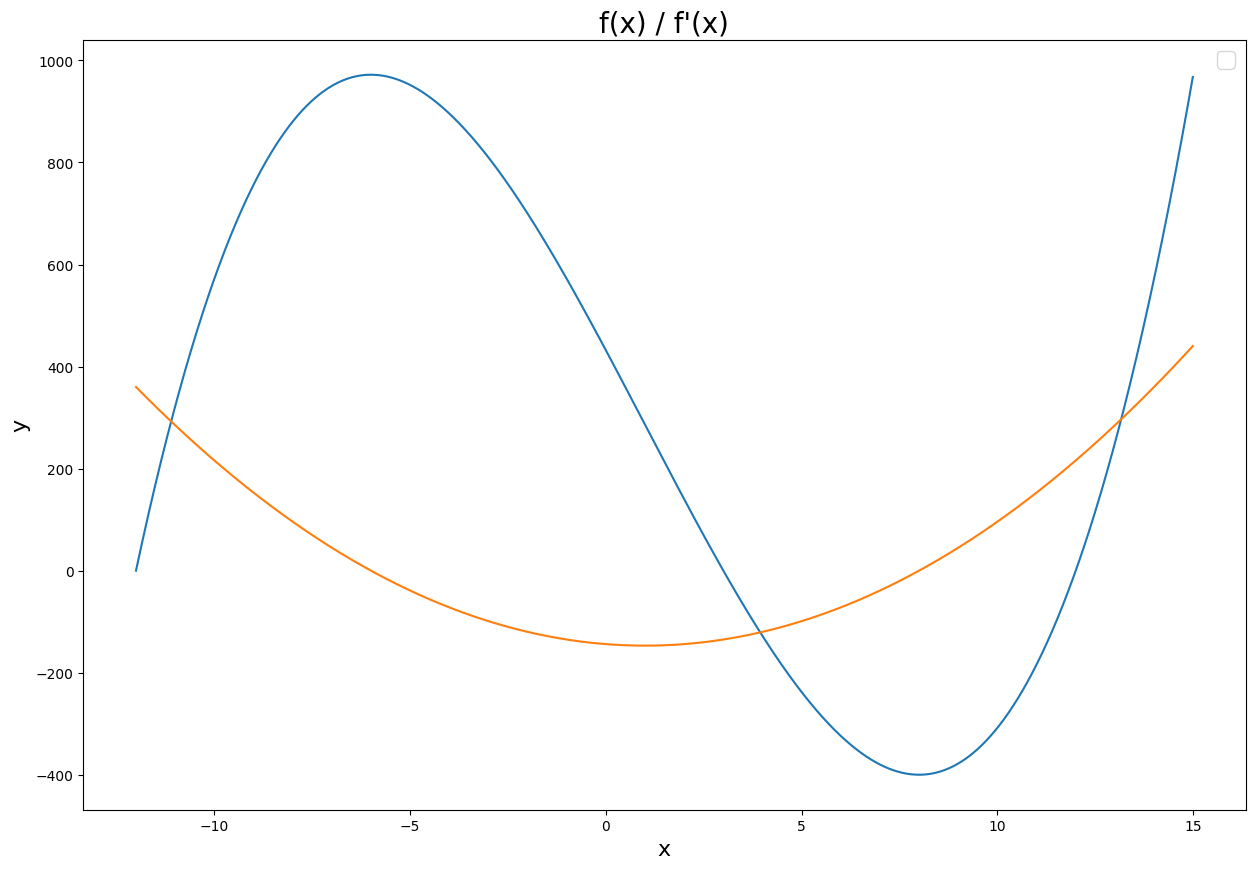

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))


# Part 2
orig_func = lambda x : x**3 - 3*x**2 - 144 * x + 432
deriv = lambda x : 3*x**2 - 6*x - 144
xs = np.arange(-12, 15, 0.01)
ys_orig = orig_func(xs)
ys_deriv = deriv(xs)





ax.plot(xs, ys_orig)
ax.plot(xs, ys_deriv)
make_pretty(ax, 'f(x) / f\'(x)', 'x', 'y')

### Experiment 1 - Part 3

<AxesSubplot:title={'center':'numerical approximation vs. original'}, xlabel='x', ylabel='y'>

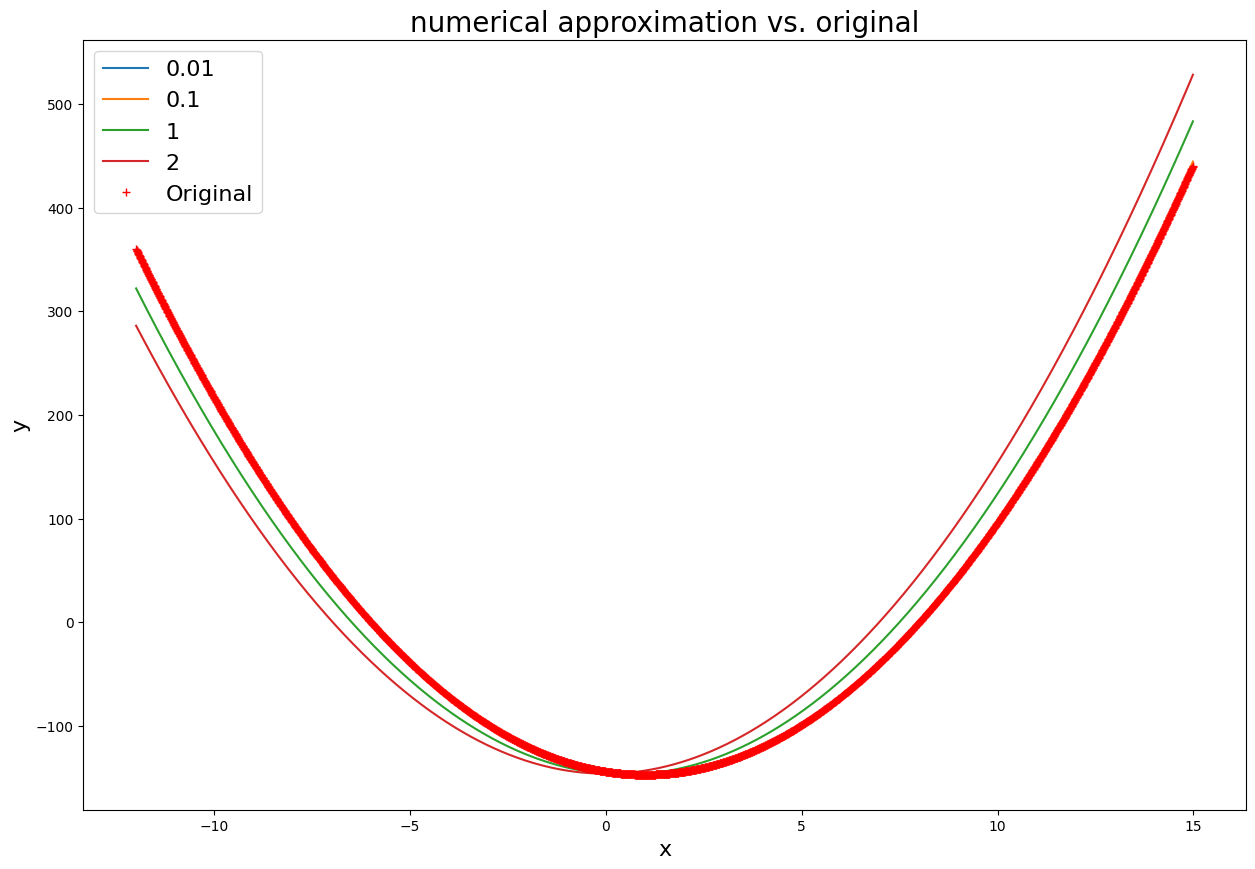

In [20]:


   
fig, ax = plt.subplots(figsize=(15, 10))

num_approx = lambda x, delta : (orig_func(x + delta) - orig_func(x)) / delta



h1 = num_approx(xs, 0.01)
h2 = num_approx(xs, 0.1)
h3 = num_approx(xs, 1)
h4 = num_approx(xs, 2)

ax.plot(xs, h1, label='0.01')
ax.plot(xs, h2, label='0.1')
ax.plot(xs, h3, label='1')
ax.plot(xs, h4, label='2')
ax.plot(xs, deriv(xs),'r+', label='Original')
make_pretty(ax, 'numerical approximation vs. original', 'x', 'y')



Blue (0.01) and orange (0.1) are basically covered because they are so close

### Here is a better visualization

<AxesSubplot:title={'center':'numerical approximation vs. original'}, xlabel='x', ylabel='y'>

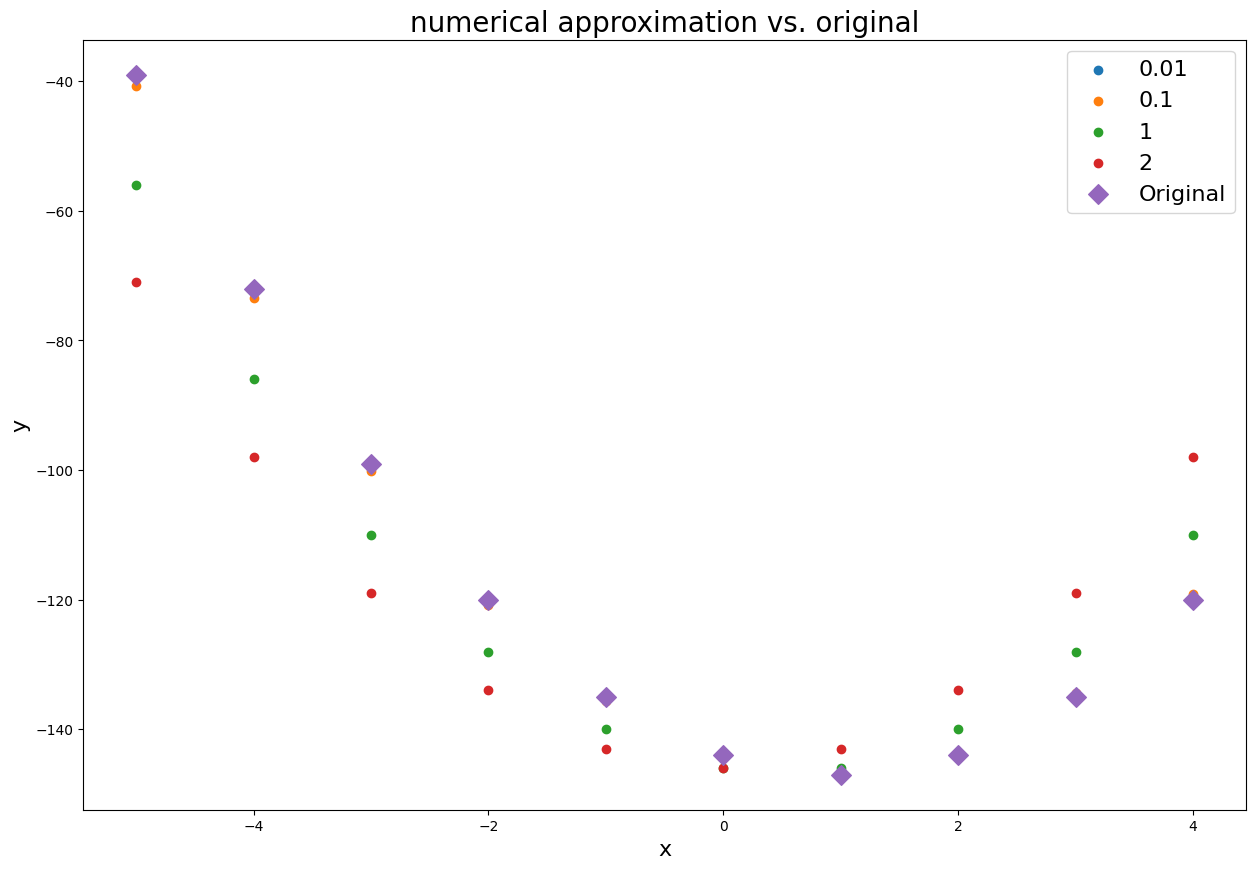

In [34]:
xss = np.arange(-5, 5, 1)

h1 = num_approx(xss, 0.01)
h2 = num_approx(xss, 0.1)
h3 = num_approx(xss, 1)
h4 = num_approx(xss, 2)
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(xss, h1, label='0.01')
ax.scatter(xss, h2, label='0.1')
ax.scatter(xss, h3, label='1')
ax.scatter(xss, h4, label='2')
ax.scatter(xss, deriv(xss),s=100,marker='D', label='Original')
make_pretty(ax, 'numerical approximation vs. original', 'x', 'y')

### Or even better we can do prediction vs. actual


<AxesSubplot:title={'center':'prediction vs actual derivatives'}, xlabel='x', ylabel='y'>

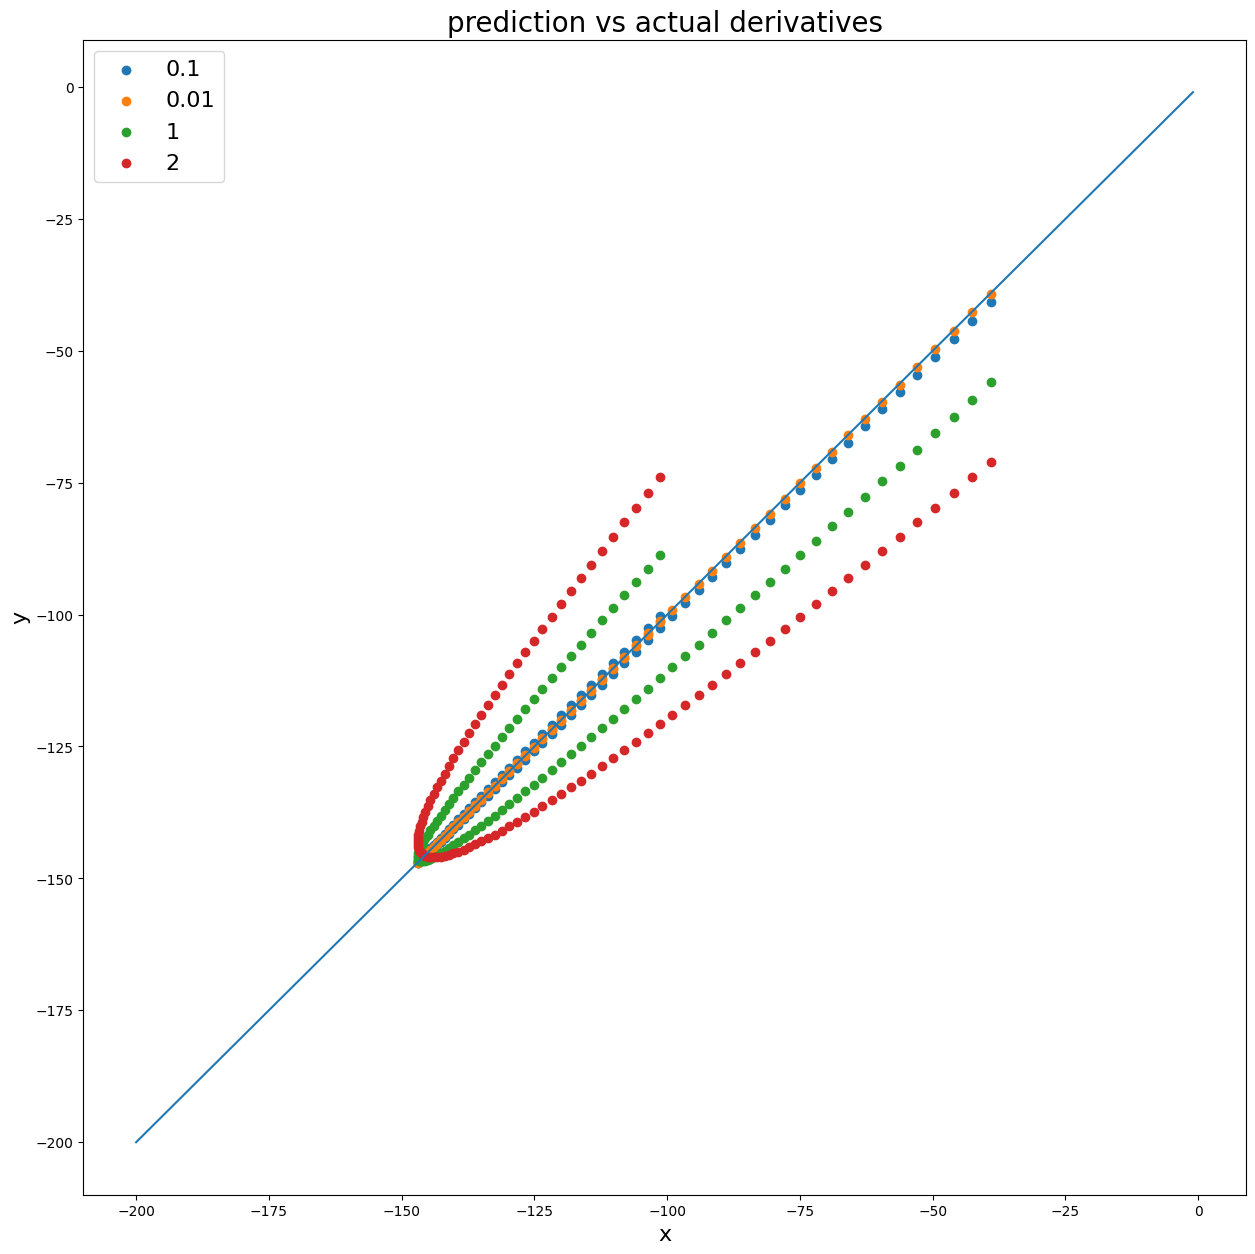

In [46]:
fig, ax = plt.subplots(figsize=(15, 15))
xss = np.arange(-5, 5, 0.1)
ax.plot(np.arange(-200, 0), np.arange(-200, 0))
ax.scatter(deriv(xss), num_approx(xss, 0.1), label='0.1')
ax.scatter(deriv(xss), num_approx(xss, 0.01), label='0.01')
ax.scatter(deriv(xss), num_approx(xss, 1), label='1')
ax.scatter(deriv(xss), num_approx(xss, 2), label='2')
make_pretty(ax, 'prediction vs actual derivatives', 'x', 'y')


## Experiment 2 - Part 1


Analytical solution: $f'(x) = 3x^2 - 6x - 144$

Values that make it 0:

Analytical solution: 
$$
f'(x) = 3x^2 - 6x - 144
0 = 3x^2 - 6x - 144
$$

ABC formula: $ x = \frac{-b +/- \sqrt{b^2 - 4ac}}{2a}$   
a = 3  
b = -6   
c = -144   

$$
Answers: 8, -6

$$

### Experiment 2 - Part 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Original Plot with derivative points'}, xlabel='x', ylabel='y'>

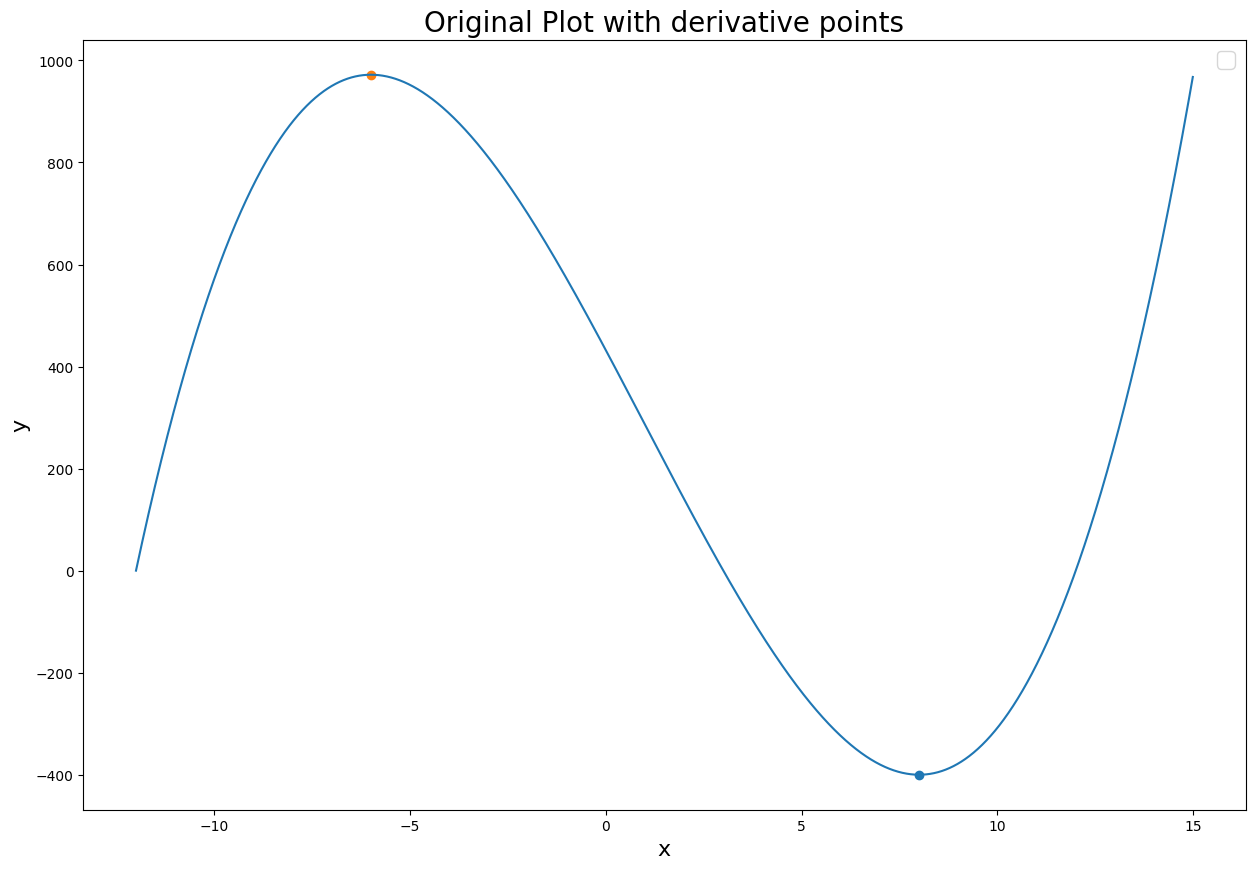

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(xs, ys_orig)
ax.scatter(8, orig_func(8))
ax.scatter(-6, orig_func(-6))
make_pretty(ax, 'Original Plot with derivative points', 'x', 'y')

### Experiment 2 - Part 3, 4 and 5

<AxesSubplot:title={'center':'Numerical Differentiation 0.01'}, xlabel='x', ylabel='y'>

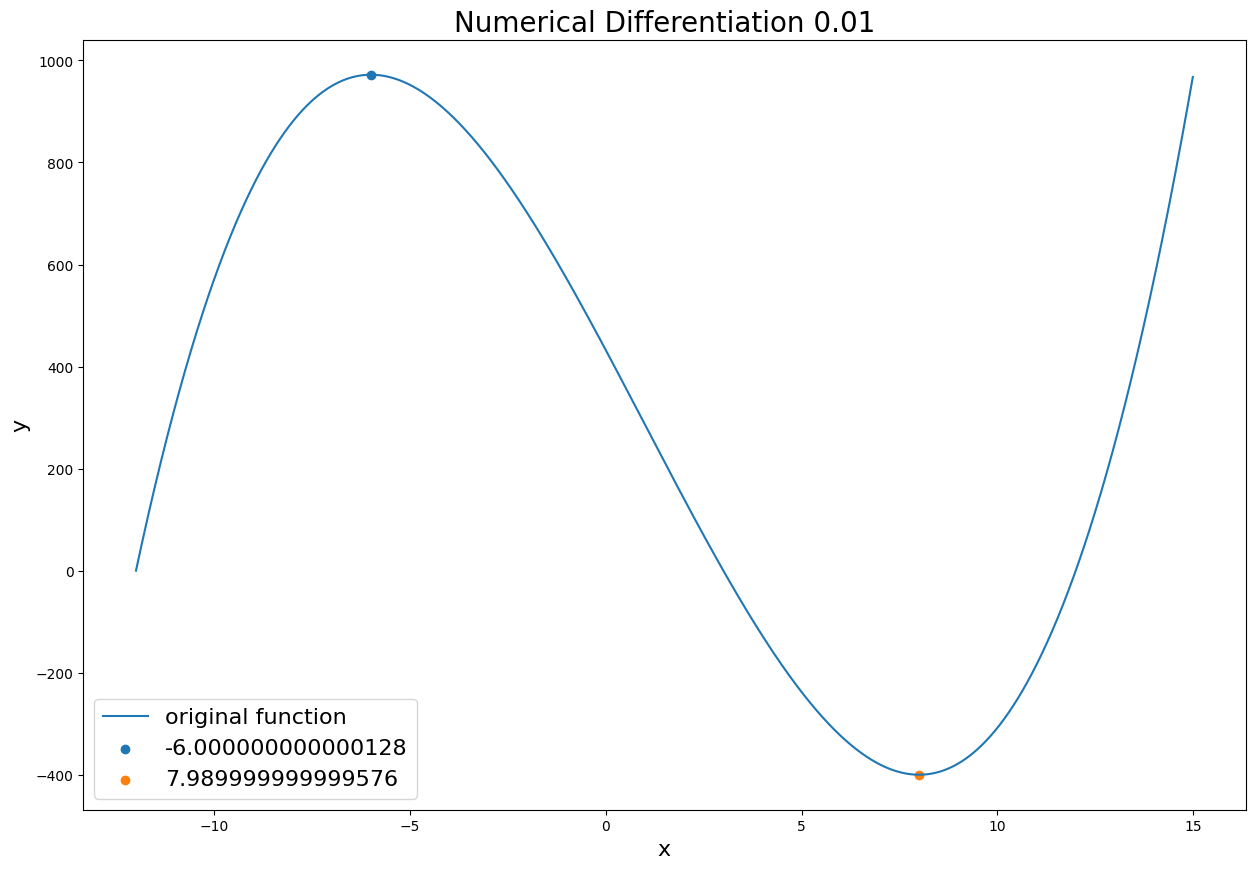

In [6]:
# finding closest index to 0
abs_h1 = [abs(x) for x in h1]
idx = np.argsort(abs_h1)


def make_plot(idx):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(xs, orig_func(xs), label='original function')
    ax.scatter(xs[idx[0]], orig_func(xs[idx[0]]), label=f'{xs[idx[0]]}')
    ax.scatter(xs[idx[1]], orig_func(xs[idx[1]]), label=f'{xs[idx[1]]}')
    return ax

ax = make_plot([idx[0], idx[1]])
make_pretty(ax, 'Numerical Differentiation 0.01', 'x', 'y')

<AxesSubplot:title={'center':'Numerical Differentiation 0.1'}, xlabel='x', ylabel='y'>

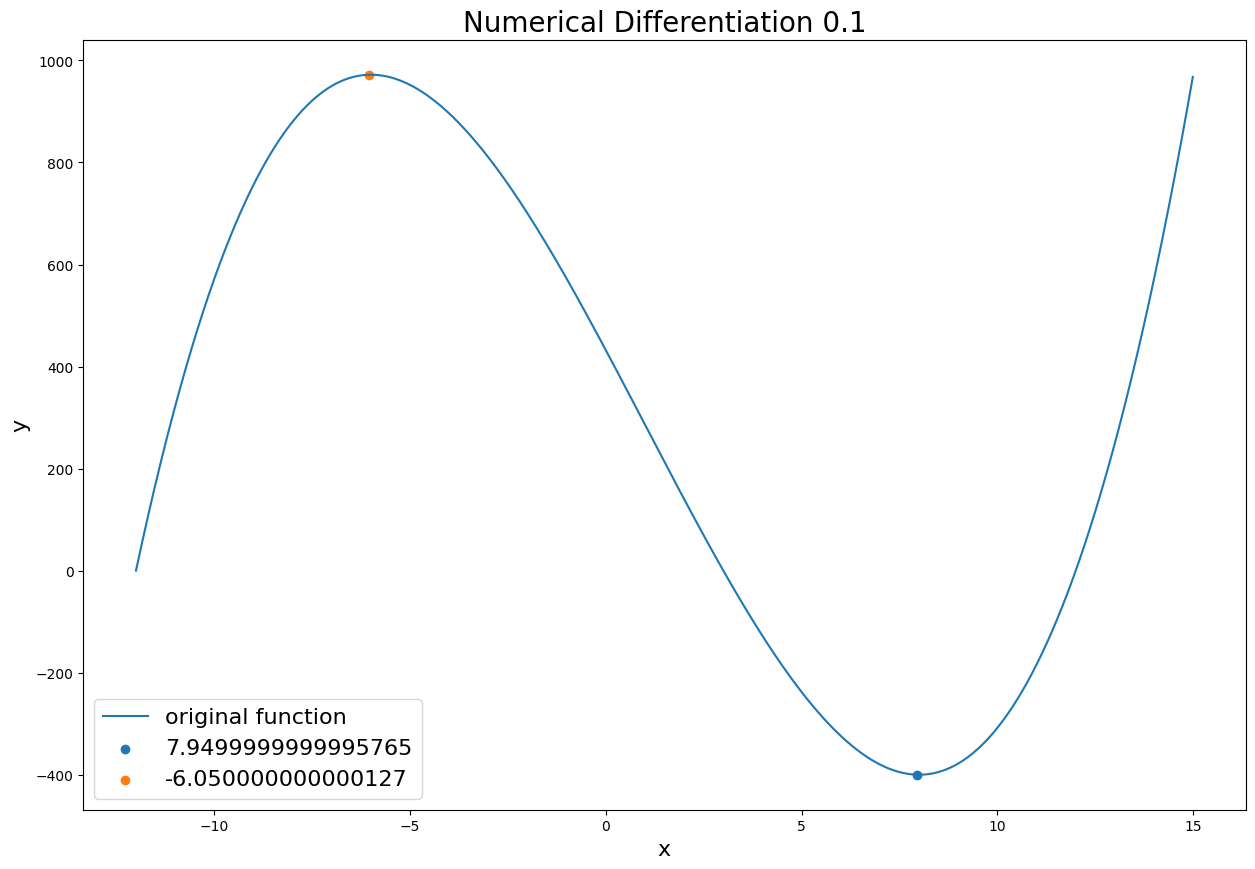

In [7]:
abs_h2 = [abs(x) for x in h2]
idx = np.argsort(abs_h2)


ax = make_plot([idx[0], idx[1]])
make_pretty(ax, 'Numerical Differentiation 0.1', 'x', 'y')

<AxesSubplot:title={'center':'Numerical Differentiation 1'}, xlabel='x', ylabel='y'>

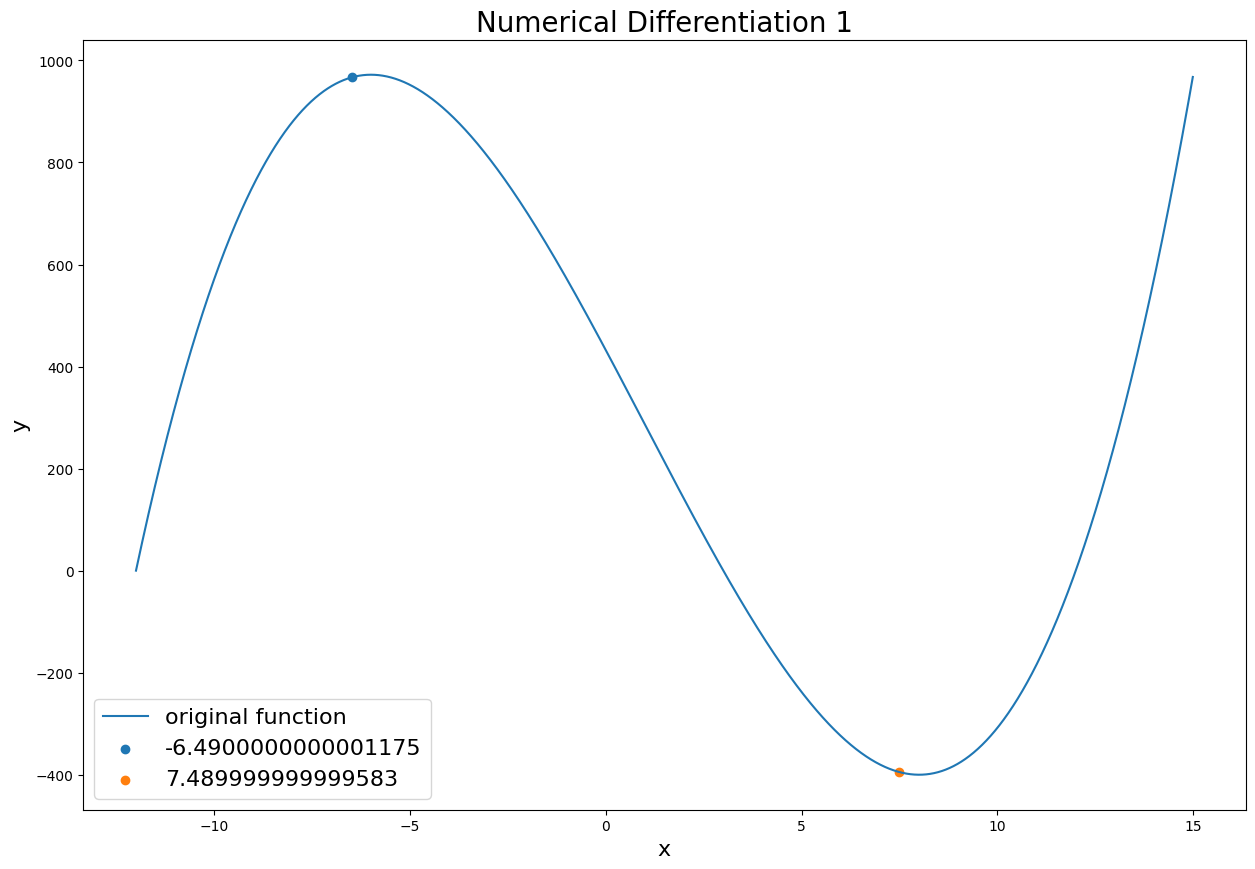

In [8]:
abs_h3 = [abs(x) for x in h3]
idx = np.argsort(abs_h3)


ax = make_plot([idx[0], idx[1]])
make_pretty(ax, 'Numerical Differentiation 1', 'x', 'y')

<AxesSubplot:title={'center':'Numerical Differentiation 2'}, xlabel='x', ylabel='y'>

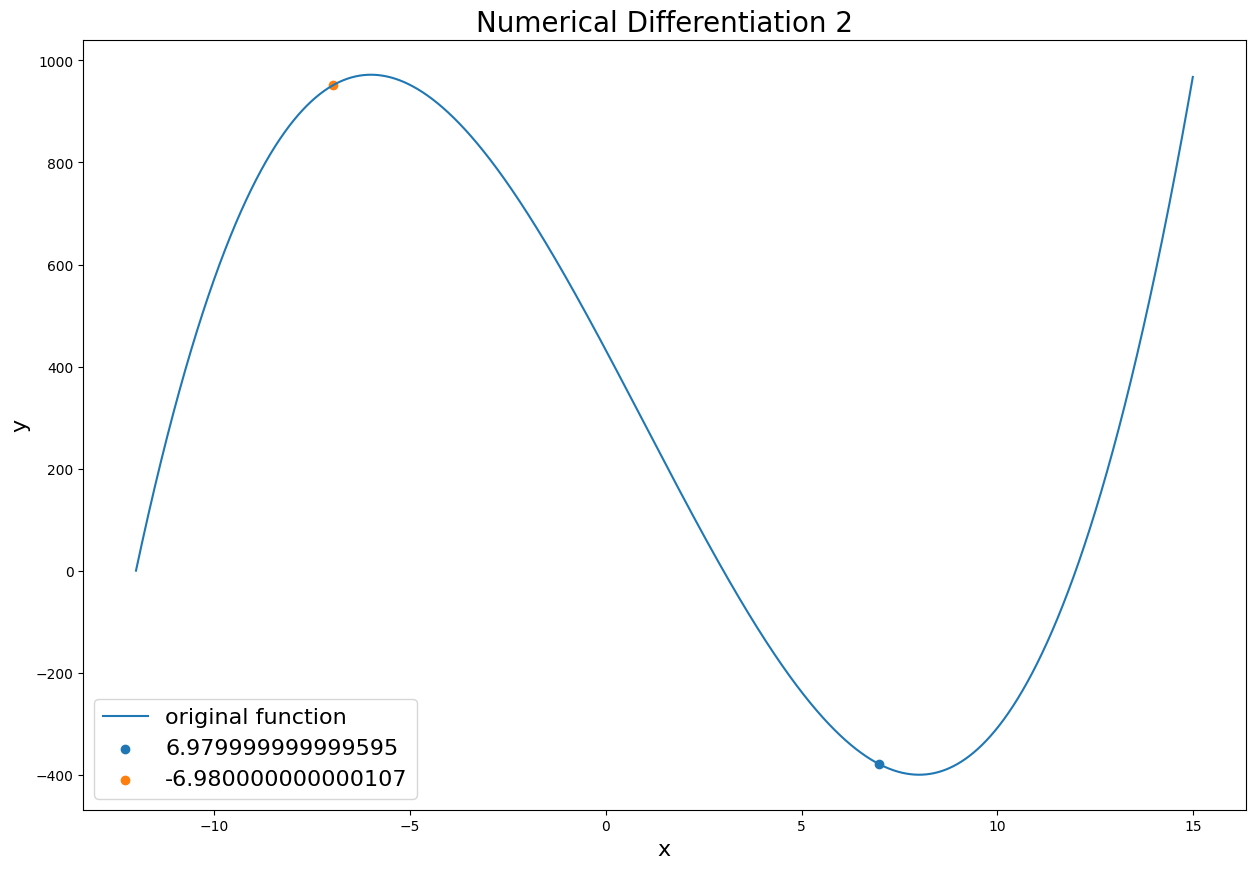

In [9]:
abs_h4 = [abs(x) for x in h4]
idx = np.argsort(abs_h4)


ax = make_plot([idx[0], idx[1]])
make_pretty(ax, 'Numerical Differentiation 2', 'x', 'y')

## Experiment 3 - Gaussian Model Grid Search - Derivative Space

### Experiment 3 - Part 1

In [10]:
from cost_functions import GaussianCostFunction
import os

gauss_path = os.path.join('gaussdist.csv')
df = pd.read_csv(gauss_path, header=None)
df.columns = ['x','y']
df.head()

,x,y
0,6.99,0.156842
1,8.90,0.007897
2,9.58,0.001551
3,5.46,0.318990
4,1.38,0.001396


### Experiment 3 - Part 3

In [11]:
delta = 1e-5
gcf = GaussianCostFunction(df['x'].values, df['y'].values)

mean_vals = np.arange(5, 6, 0.02)

std_vals = np.arange(1, 1.75, 0.02)
xx_mesh, yy_mesh = np.meshgrid(mean_vals, std_vals)
xx = xx_mesh.flatten().reshape(-1,1)
yy = yy_mesh.flatten().reshape(-1,1)
params = np.hstack((xx,yy))

nd = NumericalDifferentiation(delta)
gradients = []
for param in params:
    gradients.append(nd.gradient(gcf, param))
    
grad = np.array(gradients)


### Experiment 3 - Part 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Heat map values of derivative'}, xlabel='mean values', ylabel='std values'>

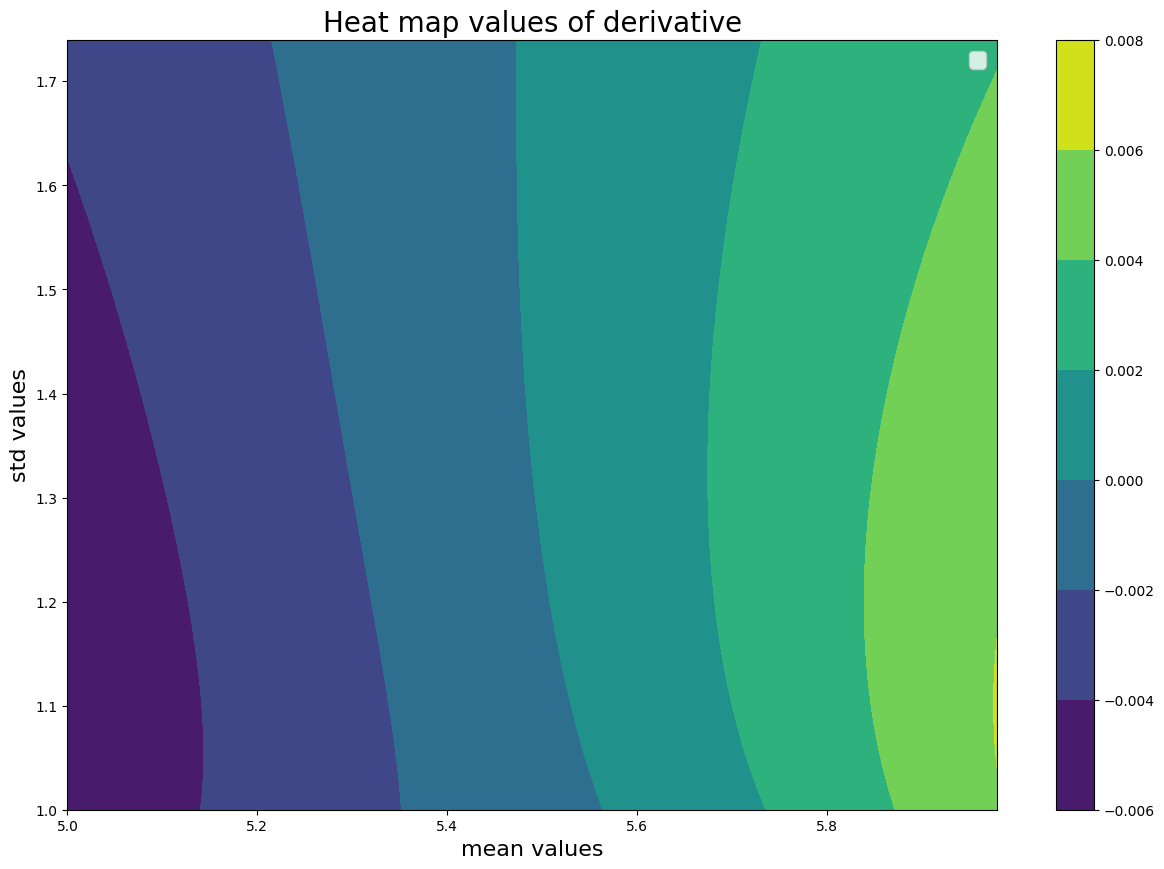

In [47]:
z = grad[:,0].reshape(38, 50)

fig, ax = plt.subplots(figsize=(15, 10))

cont = ax.contourf(xx_mesh,yy_mesh,z,levels=5)

plt.colorbar(cont)
make_pretty(ax, 'Heat map values of derivative', 'mean values', 'std values')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Heat map values of derivative'}, xlabel='mean values', ylabel='std values'>

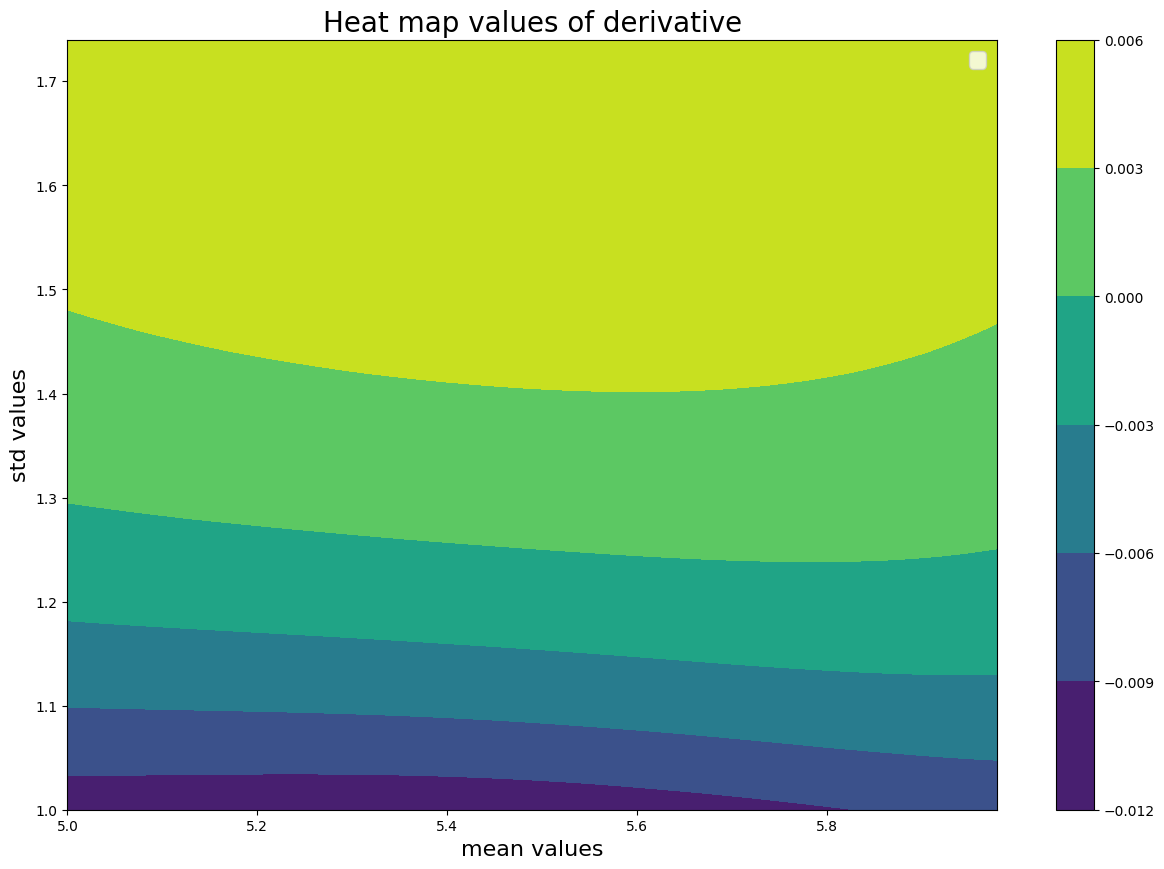

In [48]:
z = grad[:,1].reshape(38, 50)
fig, ax = plt.subplots(figsize=(15, 10))

cont = ax.contourf(xx_mesh,yy_mesh,z,levels=5)

plt.colorbar(cont)
make_pretty(ax, 'Heat map values of derivative', 'mean values', 'std values')

### Epxeriment 3 part 6

Best MEAN, STD combo: [5.48], [1.44] (MEAN Derivative)
Best STD, MEAN combo: [1.24], [5.86] (STD derivative)


<AxesSubplot:title={'center':'Predicted vs actual'}, xlabel='input', ylabel='output'>

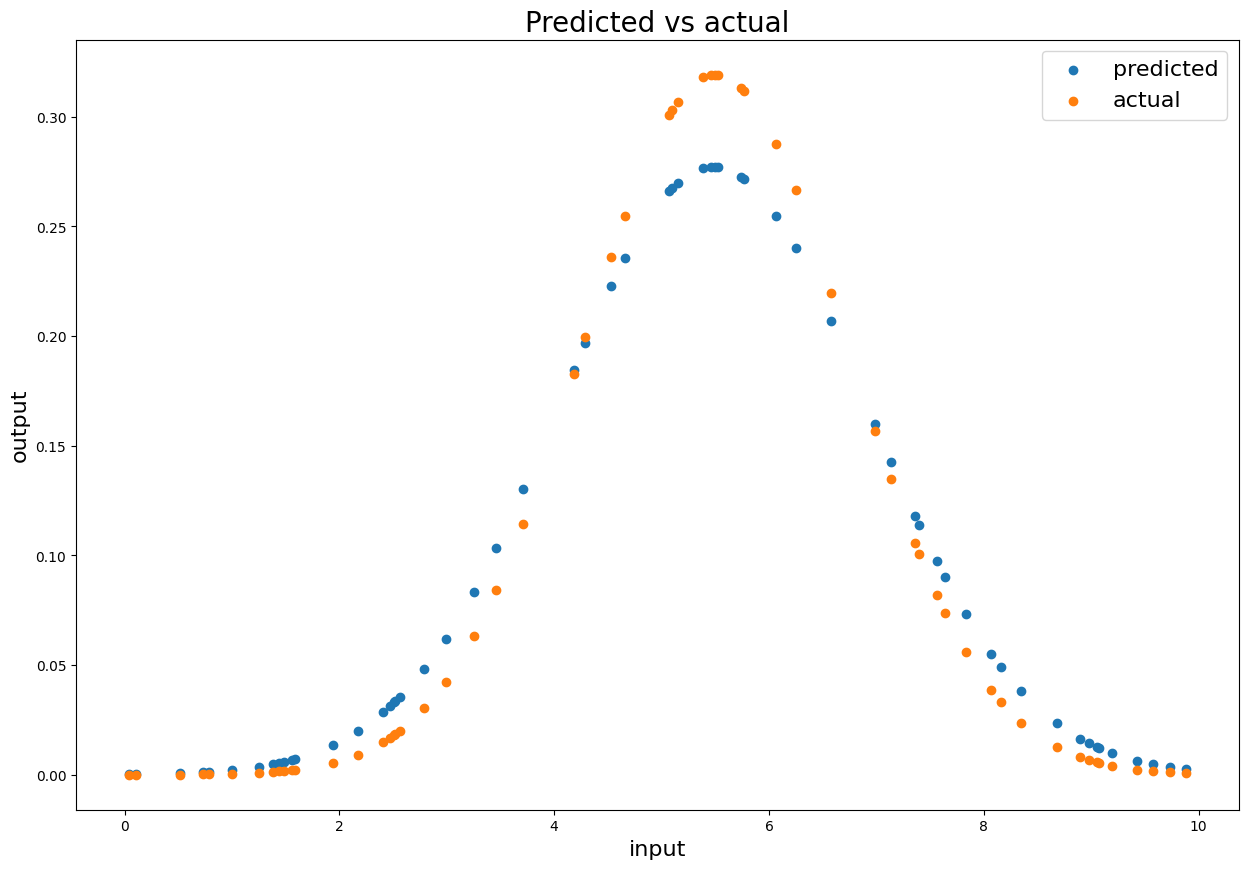

In [14]:

mean_shift = [abs(x) for x in grad[:,0]]
idx = np.argsort(mean_shift)
print(f'Best MEAN, STD combo: {xx[idx[0]]}, {yy[idx[0]]} (MEAN Derivative)')

predictions_mean = gcf.predict(df['x'].values, [xx[idx[0]], yy[idx[0]]])

std_shift = [abs(x) for x in grad[:,1]]
idx = np.argsort(std_shift)
print(f'Best STD, MEAN combo: {yy[idx[0]]}, {xx[idx[0]]} (STD derivative)')

predictions_std = gcf.predict(df['x'].values, [xx[idx[0]], yy[idx[0]]])

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(df['x'].values, predictions_mean, label='predicted')
ax.scatter(df['x'].values, df['y'].values, label='actual')
make_pretty(ax, 'Predicted vs actual', 'input', 'output')
